In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import glob as gb 
import cv2
import tensorflow as tf
import keras
import pickle 
from object_localisation import Localization 


In [27]:

train_path = "../data/train/"
test_path = "../data/test/"
weights_path = "../yolo/yolov3.weights" 
conf_path = "../yolo/yolov3.cfg" 




In [ ]:
# Exploit training dataset 
number_of_img = 0
for folder in os.listdir(train_path):
    files = gb.glob(pathname = train_path + folder + "//*.png")
    number_of_img += len(files)
    print(f"For training data, found {len(files)} in folder {folder}")
print(f"Total of training data : {number_of_img} images" )

In [ ]:
# Exploit testing  dataset
number_of_img = 0 
for folder in os.listdir(test_path):
    files = gb.glob(pathname = test_path + folder + "//*.png")
    number_of_img += len(files)
    print(f"For testing data, found {len(files)} in folder {folder}")
print(f"Total of testing data : {number_of_img} images" )

In [28]:
# Create a dictionary  with classes and indices
classes = {}
indice = 0
for folder in os.listdir(train_path):
    classes[folder] = indice
    indice += 1
# create function to get classe
def get_classe(n):
    for classe , value in classes.items():
        if n == value:
            return classe
get_classe(99)

'worm'

In [29]:
# Read images from training data and convert it into list of array
x_train = []
y_train = []
for folder in os.listdir(train_path):
    images = gb.glob(pathname = train_path + folder + "//*.png")
    for image in images:
        img = cv2.imread(image)
        x_train.append(img)
        y_train.append(classes[folder])

In [6]:
print(f"We have {len(x_train)} items in x_train")



We have 50000 items in x_train


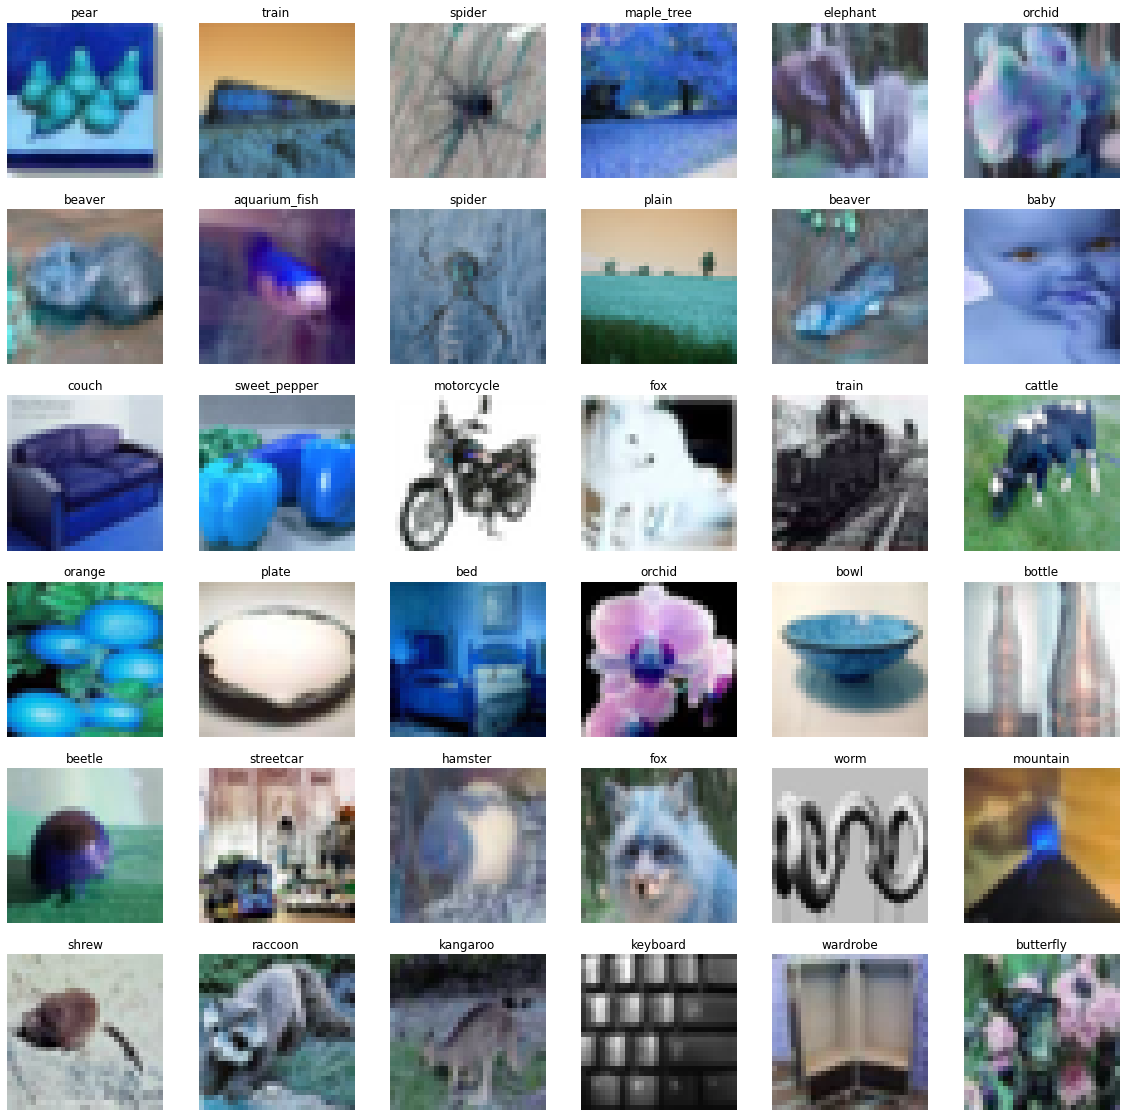

In [5]:
# display random images (36 images) from x_train
plt.figure(figsize =(20,20))
for n, i in enumerate(list(np.random.randint(0, len(x_train), 36))):
    plt.subplot(6,6, n+1)
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title(get_classe(y_train[i]))

In [30]:
# Read images from training data and convert it into list of array
x_test = []
y_test = []
for folder in os.listdir(test_path):
    images = gb.glob(pathname = test_path + folder + "//*.png")
    for image in images:
        img = cv2.imread(image)
        x_test.append(img)
        y_test.append(classes[folder])

In [8]:
print(f"We have {len(x_test)} items in x_train")

We have 10000 items in x_train


In [ ]:
# display random images (36 images) from x_test
plt.figure(figsize =(20,20))
for n, i in enumerate(list(np.random.randint(0, len(x_test), 36))):
    plt.subplot(6,6, n+1)
    plt.imshow(x_test[i])
    plt.axis("off")
    plt.title(get_classe(y_test[i]))

In [31]:
# Convert  data to nmpy array
x_train = np.array(x_train)
x_test= np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'x_train shape is {x_train.shape}')
print(f'x_test shape is {x_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

x_train shape is (50000, 32, 32, 3)
x_test shape is (10000, 32, 32, 3)
y_train shape is (50000,)
y_test shape is (10000,)


In [32]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [33]:
x_train_255 = x_train/255.0
x_test_255 = x_test/255.0
# x_train_255[0]

In [ ]:
# Building the CNN model using Keras

cnn_model = keras.models.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (32,32,3)),
        keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        keras.layers.Dropout(rate=0.25),

        keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),    
        keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),    
        keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Dropout(rate=0.25),

        keras.layers.Flatten() ,    
        keras.layers.Dense(256, activation = "relu") ,   
        keras.layers.Dropout(rate=0.5), 
               
                   
        keras.layers.Dense(100,activation='softmax')    
        ])

In [ ]:
cnn_model_1 = keras.models.Sequential([
        keras.layers.Conv2D(filters=32,kernel_size=3, padding="same", activation="relu", input_shape=(32,32,3)),
        keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),

        keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),

        keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
        keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),

        keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),

        keras.layers.Flatten(),

        keras.layers.Dropout(0.5,noise_shape=None,seed=None),

        keras.layers.Dense(128,activation='relu'),
               
                   
        keras.layers.Dense(100,activation='softmax')    
        ])

In [34]:
cnn_model_2 = keras.models.Sequential([
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
        

        keras.layers.MaxPool2D(pool_size=(2, 2)),

        keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
        

        keras.layers.MaxPool2D(pool_size=(2, 2)),

        keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),

        keras.layers.MaxPool2D(pool_size=(2, 2)),

        keras.layers.Flatten(),

       

        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
               
                   
        keras.layers.Dense(100,activation='softmax')    
        ])

In [50]:
# Complie the model
# cnn_model.compile(optimizer ="adam", loss="sparse_categorical_crossentropy", metrics =['accuracy'])
cnn_model_2 .compile(optimizer ="Adam", loss="sparse_categorical_crossentropy", metrics ="sparse_categorical_accuracy")

In [12]:
print(cnn_model_2 .summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [36]:
epochs = 2
model = cnn_model_2.fit(x_train_255, y_train, epochs =epochs, )

Epoch 1/2
1563/1563 [==============================] - 29s 18ms/step - loss: 3.9611 - sparse_categorical_accuracy: 0.0866
Epoch 2/2
1563/1563 [==============================] - 29s 19ms/step - loss: 3.2742 - sparse_categorical_accuracy: 0.2007


In [37]:
cnn_model_2.save("../model/model_v2.h5")

In [38]:
model_loss, model_accuracy = cnn_model_2.evaluate(x_test_255, y_test)

print('Test Loss is {}'.format(model_loss))
print('Test Accuracy is {}'.format(model_accuracy))

313/313 [==============================] - 2s 6ms/step - loss: 3.1146 - sparse_categorical_accuracy: 0.2330
Test Loss is 3.1145734786987305
Test Accuracy is 0.2329999953508377


In [52]:

import keras2onnx
import onnx


test_cnn_model_2 = keras.models.load_model("../model/model_v2.model")
# print(type(test_cnn_model_2))



#covert to onxx model
onnx_model_name = 'cnn_model_2.onnx'

onnx_model = keras2onnx.convert_keras(test_cnn_model_2, test_cnn_model_2.name)

onnx.save_model(onnx_model,onnx_model_name )



tf executing eager_mode: True
tf.keras model eager_mode: False


TypeError: must be str, not NoneType

In [21]:
# Testing mode
image_test_path = ("../data/predict/APPLE.png")
Localization().object_detection(test_cnn_model_2, train_path, image_test_path, weights_path, conf_path)
